Tiwa Savage is a Nigerian Singer. The goal of this project is to scrape lyrics on the web and create a wordcloud of the lyrics to see popular words in her lyrics

In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import requests
import re
import pprint
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt


In [2]:
##get the link of the Tiwa Savage lyrics
URL_tiwa = requests.get('https://www.lyrics.com/artist/Tiwa-Savage/2237809').text

In [3]:
#Extract all links of the lyrics using Regular Expressions
pattern = "lyric/\d+/Tiwa\+Savage/[^\"]+"
Tiwa_lyrics=re.findall(pattern, URL_tiwa, re.IGNORECASE) 

In [4]:
#loop through the links and append hyperlink to access the lyrics link
for song in range(len(Tiwa_lyrics)):
    Tiwa_lyrics[song] = 'https://www.lyrics.com/' + Tiwa_lyrics[song]  


In [5]:
#create a function to scrape corpus of lyrics from all the songs
def lyrics_corpus(lyrics_links):
    lyrics=[]
    for link in lyrics_links:
        check=requests.head(link)
        status_link=check.status_code
        if status_link ==200:
            lyrics_text=requests.get(link).text
            lyrics_soup=BeautifulSoup(lyrics_text, 'html.parser')
            lyrics_corpus=lyrics_soup.find(attrs={"class":"lyric-body"}).text
            lyrics.append(lyrics_corpus)
        else:
            continue
    return lyrics

In [6]:
#download lyrics of Tiwa's songs
Tiwa_corpus=lyrics_corpus(Tiwa_lyrics)
pprint.pprint(Tiwa_corpus)

['The other sun and the moon bow for you\r\n'
 "But you won't open your eyes\r\n"
 'Omo oba ma gbagbe\r\n'
 'Ranti oruko baba e, ohh\r\n'
 '\r\n'
 'Tick tock, pretty baby\r\n'
 "You can get it back, don't you waste it\r\n"
 'To grow from your past, gotta face it\r\n'
 "Oh yeah (you're the key to the kingdom)\r\n"
 '\r\n'
 "Oh, you're rather empty, don't know what's inside\r\n"
 "But you're the key to the kingdom\r\n"
 "You're the key to the kingdom\r\n"
 'Oh, so believe\r\n'
 "Even if you can't see, I'll never leave\r\n"
 "'Cause you're the key to the kingdom\r\n"
 "You're the key to the kingdom\r\n"
 '\r\n'
 'Here some things you have to know\r\n'
 'It go hard from have to grow\r\n'
 "When you feel you've had enough\r\n"
 'You gotta breathe\r\n'
 'Just remember who you are\r\n'
 'You forget, look to the stars\r\n'
 'Even the strong, yeah, the weak\r\n'
 "But you're the key, you're the key\r\n"
 '\r\n'
 'Tick tock, pretty baby\r\n'
 "You can get it back, don't you waste it\r\n"
 'To gr

In [7]:
#clean the lyrics text
clean_corpus = [elements.replace('\r\n', ' ').replace('\n',' ') for elements in Tiwa_corpus]
pprint.pprint(clean_corpus)

["The other sun and the moon bow for you But you won't open your eyes Omo oba "
 'ma gbagbe Ranti oruko baba e, ohh  Tick tock, pretty baby You can get it '
 "back, don't you waste it To grow from your past, gotta face it Oh yeah "
 "(you're the key to the kingdom)  Oh, you're rather empty, don't know what's "
 "inside But you're the key to the kingdom You're the key to the kingdom Oh, "
 "so believe Even if you can't see, I'll never leave 'Cause you're the key to "
 "the kingdom You're the key to the kingdom  Here some things you have to know "
 "It go hard from have to grow When you feel you've had enough You gotta "
 'breathe Just remember who you are You forget, look to the stars Even the '
 "strong, yeah, the weak But you're the key, you're the key  Tick tock, pretty "
 "baby You can get it back, don't you waste it To grow from your past, gotta "
 'face it Oh yeah, yeah, yeah Tick tock, pretty baby (tick tock, pretty baby) '
 "You can get it back, don't you waste it (get it back, 

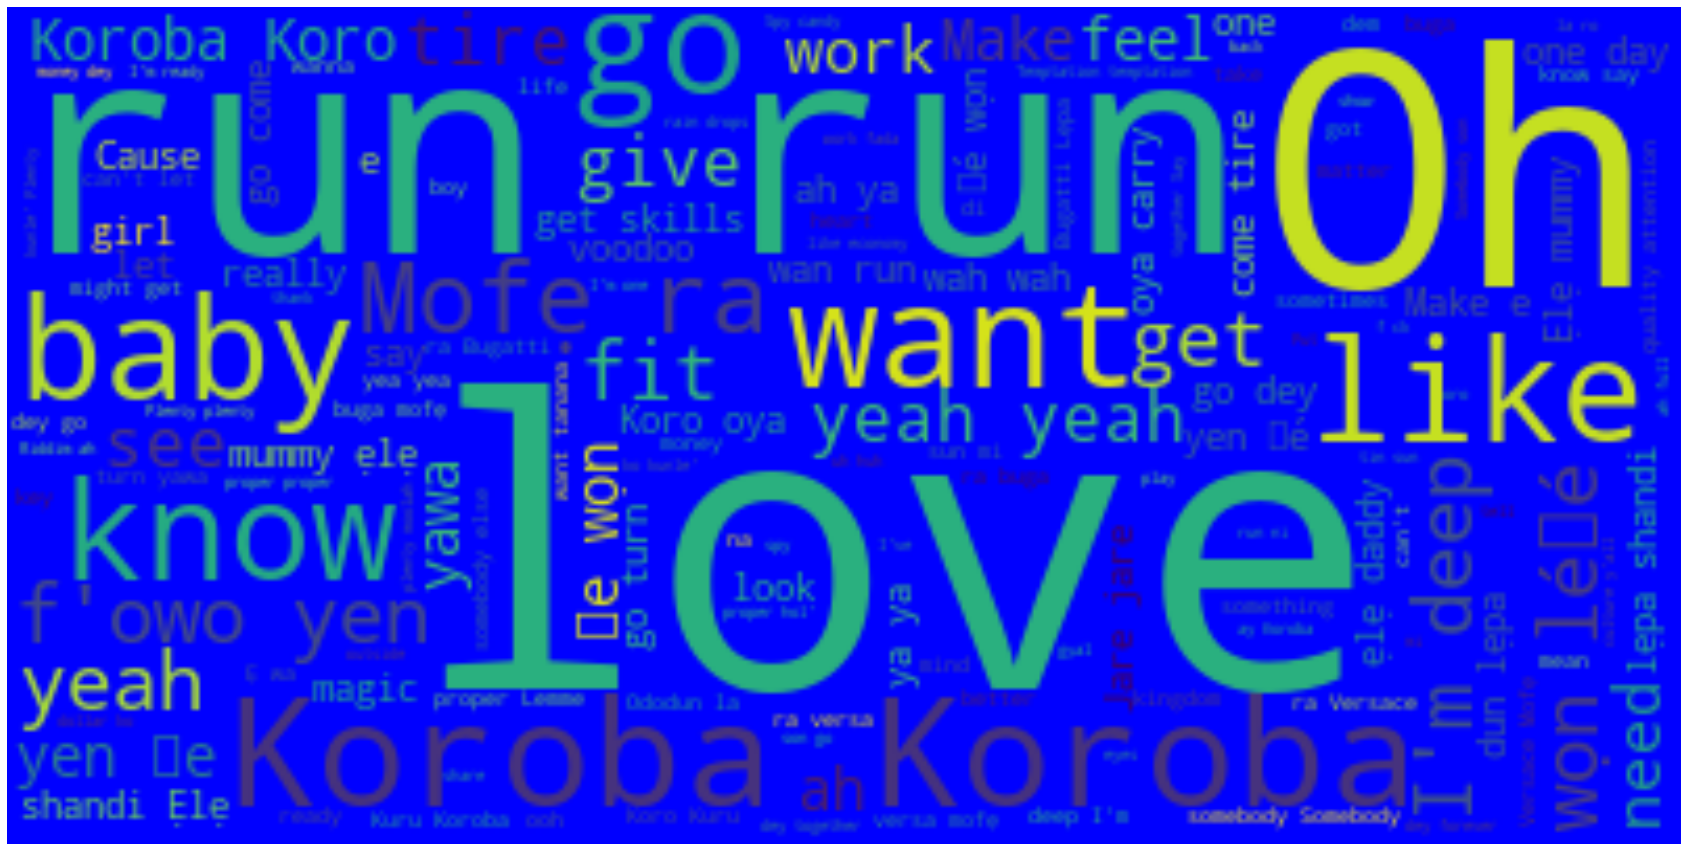

In [8]:
#create wordcloud of Tiwa lyrics
STOPWORDS = stopwords.words('english') #stopword frm nltk
data = pd.DataFrame({'text':clean_corpus})  ###create dataframe of data
text = " ".join(i for i in data.text)  ##join the all the text in the data
stopwords = set(STOPWORDS)  ##to remove the stopword from text
Tiwa_cloud = WordCloud(stopwords=stopwords, background_color="blue").generate(text) 
plt.figure(figsize=(30,20))
plt.imshow(Tiwa_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()